# Solving probability problems with simulations

<span style='background :green' > Problem 1:</span>  Tossing a fair coin.

We are going to calculate the probability of getting a HEAD after tossin a coin multiple times. The number of flips will vary for each experiment. We are going to perform 1000 experiments. For each experiment, the coin will be tossed N number of times.

For instance, the coin will be tossed 1 time in experiment number 1.<br>
The coin will be tossed 2 times in experiment number 2.<br>
The coin will be tossed 3 times in experiment number 3.<br>
and so on....<br>
The coin will be tossed 1000 times in experiment number 1000. 

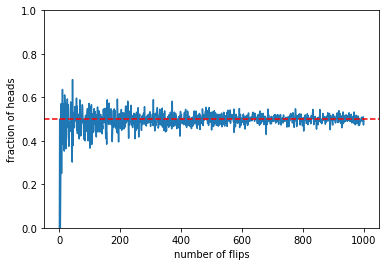

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

vp = [] # list that stores the probability of getting a head for each experiment
vsim_N = [] # Number of times that the coin was tossed for each experiment (this also represents the number of each experimet)
Nmax = 1000 # maximum number of simulations (this represents the total number of experiments)
coin = ['H','T']
for N in np.arange(1,Nmax):
    nhead = 0
    for i in range(1,N): # in this for loop we are actually "flipping" the coin N number of times
        r = random.choice(coin) # randomly select an item from a list with equal probability for each item
        if r == 'H':
            nhead = nhead + 1
    vp.append(nhead/N) # calculation of probability: number of heads divided by the number of times the coin was flipped
    vsim_N.append(N)
    
    
# Plotting the probability 
plt.figure()
plt.plot(vsim_N,vp)
plt.axhline(y=1/2, color='r', linestyle='--', label = 'theoretical value')
plt.ylabel('fraction of heads')
plt.xlabel('number of flips')
plt.ylim([0.0,1.0])
plt.show()
        

As the number of flips increases, the fraction of heads get closer to the theoretical value of 0.5. This follows the definition of probability of an event A to occur:
$$
P(A) = \lim_{N\rightarrow \infty} \frac{n_A}{N},
$$
where $N$ is the number of experiments.

Pela definição frequentista de probabilidades, vimos que a probabilidade de ocorrência de um evento $A$ é definida por:
$$
P(A) = \lim_{n\rightarrow \infty} \frac{n_A}{n},
$$
onde $n$ é o número de experimentos.

<span style='background :green' >Problem 2:</span> tossing two dices at the same time.

Two dices are tossed at the same time. What is the probability:<br>
a) that the sum of the faces are equal to 7 (event A).<br>
b) to obtain a sum larger than 5 (event B).<br>

In [2]:
import random
import numpy as np

dice1 = [1,2,3,4,5,6]
dice2 = [1,2,3,4,5,6]

N=1000000
count_A = 0
count_B = 0
for i in range(N):
    r1 = random.choice(dice1)
    r2 = random.choice(dice2)
    soma = r1+r2
    if soma == 7:
        count_A = count_A+1
    if soma > 5:
        count_B = count_B+1
        
print('The probability of the sum be equal to 7 is:',count_A/N)
print('The probability of the sum be larger than 5 is:',count_B/N)

The probability of the sum be equal to 7 is: 0.166896
The probability of the sum be larger than 5 is: 0.722796


The theoretical values are: 
$$
P(A) = 1/6 = 0.166
$$
$$
P(B) = 26/36 = 0.72.
$$

<span style='background :green' >Problem 4:</span> Tossing a dice.

What is the probability that when tossing a dice, the outcome be even or larger than three?<br>
The theoretical answer is 4/6 = 0.6667.

In [3]:
import random

dice = range(1,7)
N = 1000000

count = 0
for i in range(N):
    r = random.choice(dice)
    if (r%2 == 0) or (r > 3):
        count = count+1
        
print('answer:',count/N)

answer: 0.667109


<span style='background :green' >Problem 5:</span> Raffle.

A box used in a raffle contains 5 black balls numbered 1 to 5, seven white balls numbered 1 to 7, and eight red balls numbered 1 to 8. <br>
i) Drawing a ball from this box, what is the probability of finding a black ball? Answer: $P(A)=5/20=0.25$<br>
ii) Drawing a black ball, what is the probability that this ball is even? Answer: $P(B|A) = \frac{2/20}{5/20} = \frac{2}{5}= 0.4$



In [4]:
black = ['P'+str(i) for i in range(1,6)]
white = ['W'+str(i) for i in range(1,8)]
red = ['R'+str(i) for i in range(1,9)]
box = black+white+red
nA = 0
nB = 0

N = 1000000
for i in range(N):
    r = random.choice(box)
    if 'P' in r:
        nA = nA+1
        if int(r[1])%2 == 0:
            nB = nB + 1
        
print('P(A) = ',nA/N)
print('P(B|A) = ',nB/nA)

P(A) =  0.250205
P(B|A) =  0.3982734157990448


<span style='background :green' >Problem 6:</span> Tossing two dices at the same time - PMF (probability mass function)

Considering the roll of two dice, we define the random variable X as 1 when the sum of the dice values is even and as 0 otherwise. What is the probability distribution of X?

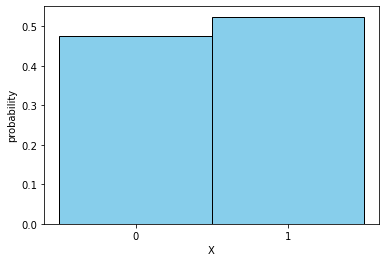

In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np

dice1, dice2 = range(1,7) , range(1,7)
N = 1000
X = []
for i in range(N):
    r1 = random.choice(dice1)
    r2 = random.choice(dice2)
    soma = r1 + r2
    if soma%2 == 0:
        X.append(0)
    else:
        X.append(1)

(counts, bins) = np.histogram(X,bins = [-0.5,0.5,1.5]) # I can also use 'density' parameter here

factor = 1/N
plt.hist(bins[:-1], bins,  color='skyblue', edgecolor='black', weights=factor*counts)
#plt.hist(bins[:-1], bins,  color='skyblue', edgecolor='black', weights=counts, density=True) I could also use this line instead.
#there is a slightly difference, but the first one is more intuitive and works in this case.
plt.xlabel('X')
plt.ylabel('probability')
plt.xticks([0, 1])
plt.show()


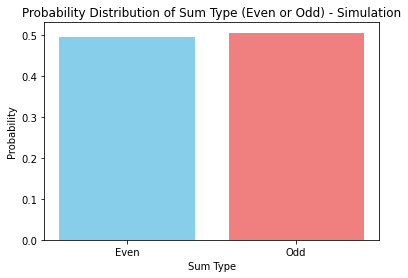

In [8]:
#Following a different reasoning. I particularly prefer the one above.

import random
import matplotlib.pyplot as plt

# Number of simulations
N = 1000

# Initialize counts for even and odd sums
even_count = 0
odd_count = 0

# Simulate rolling two dice N times
for _ in range(N):
    dice1 = random.randint(1, 6)
    dice2 = random.randint(1, 6)
    if (dice1 + dice2) % 2 == 0:
        even_count += 1
    else:
        odd_count += 1

# Calculate probabilities
even_probability = even_count / N
odd_probability = odd_count / N

# Plotting the probability distribution
plt.bar(['Even', 'Odd'], [even_probability, odd_probability], color=['skyblue', 'lightcoral'])
plt.xlabel('Sum Type')
plt.ylabel('Probability')
plt.title('Probability Distribution of Sum Type (Even or Odd) - Simulation')
plt.show()


As the number of experiments, N, increases, the PDF get closer to the real PDF.

<span style='background :green' >Problem 7:</span>

When two coins are tossed, let X be the random variable indicating the number of heads. Determine the probability distribution of X.

<function matplotlib.pyplot.show(close=None, block=None)>

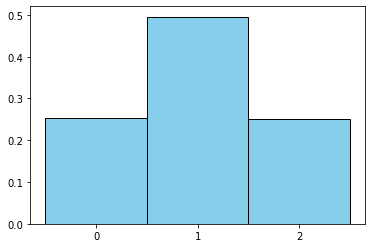

In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

coin1 = ['H','T']
coin2 = ['H','T']
X = []
N = 10000
for i in range(N):
    r1 = random.choice(coin1)
    r2 = random.choice(coin2)
    s = r1+r2 # create a string with the result
    n_heads = s.count('H')
    #n_tails = s.count('T')
    X.append(n_heads)
    
(counts, bins) = np.histogram(X, bins = [-0.5,0.5,1.5,2.5],density = True)

plt.hist(bins[:-1],bins,weights=counts,  color='skyblue', edgecolor='black')
plt.xticks([0,1,2])
plt.show
    

Answer: <br>
$P(X=0) = 1/4$<br>
$P(X=1) = 1/2$<br>
$P(X=2) = 1/4$

<span style='background :green' >Nothing important below.</span>

The following codes are just to practice a little bit of ploting histograms. 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1    3    7   15   36   50  114  175  253  389  520  660  824
  898 1017  997  937  850  675  520  353  278  189  121   54   30   16
    8    5    3    1    1    0    0    0    0    0    0    0    0    0
    0    0    0]


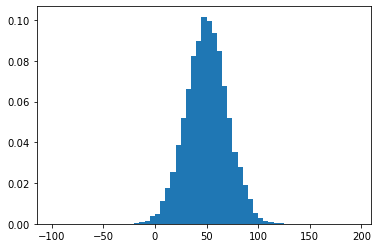

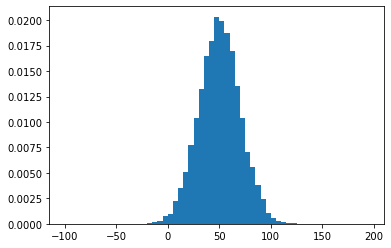

In [10]:
from matplotlib import pyplot
import numpy

N = 10000
numpy.random.seed(1)
data = numpy.random.normal(50, 20, N)
(counts, bins) = numpy.histogram(data, bins=range(-100,200,5))
print(counts)

pyplot.hist(bins[:-1], bins, weights=counts/N)
pyplot.show()

pyplot.hist(bins[:-1], bins, weights=counts, density=True)
pyplot.show()

#note the difference between the histograms. If the width of the bins were equal to 1, the histograms would be the same. 
#Only the second histogram really represents the pdf. 
#But the first histogram is good to see the the proportion of the data


#Check the following link to see the discussion on how to normalize histograms:
#https://www.itl.nist.gov/div898/handbook/eda/section3/histogra.htm#:~:text=The%20normalized%20count%20is%20the%20count%20in%20the%20class%20divided,histogram%20is%20equal%20to%20one.

In [11]:
bins[0:3]

array([-100,  -95,  -90])

In [12]:
integral = np.trapz(counts[0:2],x = bins[:3])
print(integral)

0.0


In [13]:
bins[0:-1]

array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95,  100,  105,  110,  115,
        120,  125,  130,  135,  140,  145,  150,  155,  160,  165,  170,
        175,  180,  185,  190])